In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from transformers import AutoTokenizer
from scipy.optimize import curve_fit

from os import listdir
from os.path import isfile, join

/home/dongkeun/miniconda3/envs/reward/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dongkeun/miniconda3/envs/reward/lib/python3.11/site-packages/transformers/utils/hub.py:127: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [5]:
merged_1 = pd.read_csv('sample_data/gpt-4-scores.csv')
merged_2 = pd.read_csv('sample_data/prometheus-scores.csv')
merged_3 = pd.read_csv('sample_data/skyworks-scores.csv')

/home/dongkeun/miniconda3/envs/reward/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/home/dongkeun/miniconda3/envs/reward/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


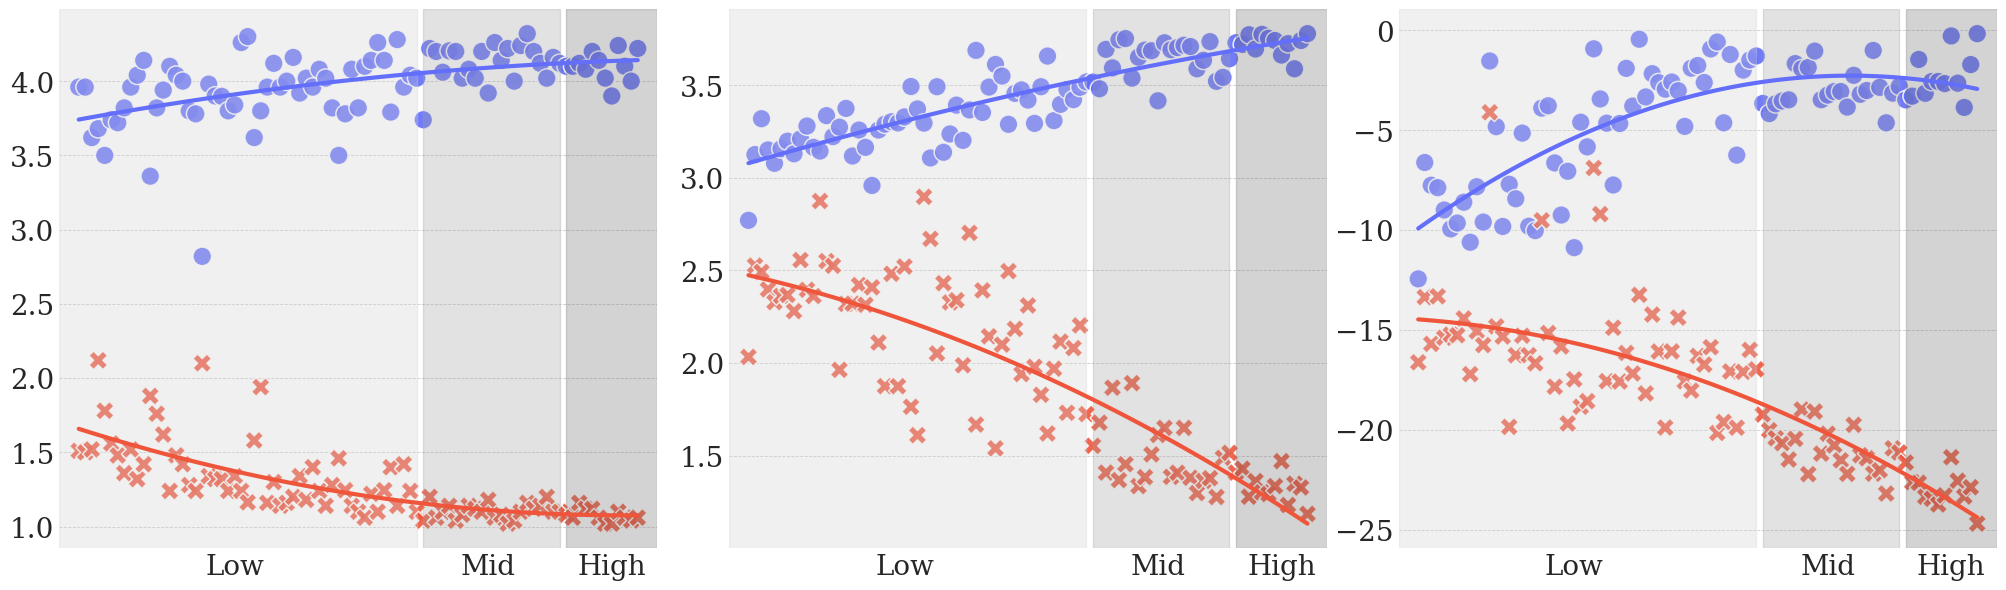

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

# Set seaborn style
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 20  # Adjust font size as needed
marker_size = 180
marker_alpha = 0.9

# Define colors
y1_color = '#636EFA'
y2_color = '#EF553B'

back_color_1 = '#D0D0D0'  # Light Gray
back_color_2 = '#A0A0A0'  # Medium Gray
back_color_3 = '#707070'  # Dark Gray

# Prepare data for the first subplot
average_chosen_scores_1 = merged_1['average_chosen_scores']
average_rejected_scores_1 = merged_1['average_rejected_scores']
resource_1 = merged_1['resource_level']

x1 = np.array(range(len(average_chosen_scores_1)))

# Create DataFrame for the first subplot
df1_long = pd.DataFrame({
    'x': np.concatenate([x1, x1]),
    'score': np.concatenate([average_chosen_scores_1, average_rejected_scores_1]),
    'type': ['Chosen']*len(x1) + ['Rejected']*len(x1),
    'resource_level': list(resource_1) + list(resource_1)
})

# Prepare data for the second subplot
average_chosen_scores_2 = merged_2['average_chosen_scores']
average_rejected_scores_2 = merged_2['average_rejected_scores']
resource_2 = merged_2['resource_level']

x2 = np.array(range(len(average_chosen_scores_2)))

# Create DataFrame for the second subplot
df2_long = pd.DataFrame({
    'x': np.concatenate([x2, x2]),
    'score': np.concatenate([average_chosen_scores_2, average_rejected_scores_2]),
    'type': ['Chosen']*len(x2) + ['Rejected']*len(x2),
    'resource_level': list(resource_2) + list(resource_2)
})

# Prepare data for the third subplot
average_chosen_scores_3 = merged_3['average_chosen_scores']
average_rejected_scores_3 = merged_3['average_rejected_scores']
resource_3 = merged_3['resource_level']

x3 = np.array(range(len(average_chosen_scores_3)))

# Create DataFrame for the third subplot
df3_long = pd.DataFrame({
    'x': np.concatenate([x3, x3]),
    'score': np.concatenate([average_chosen_scores_3, average_rejected_scores_3]),
    'type': ['Chosen']*len(x3) + ['Rejected']*len(x3),
    'resource_level': list(resource_3) + list(resource_3)
})

# Function to fit a curve (polynomial fit)
def fit_func(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the datasets
popt1_1, _ = curve_fit(fit_func, x1, average_chosen_scores_1)
popt2_1, _ = curve_fit(fit_func, x1, average_rejected_scores_1)

popt1_2, _ = curve_fit(fit_func, x2, average_chosen_scores_2)
popt2_2, _ = curve_fit(fit_func, x2, average_rejected_scores_2)

popt1_3, _ = curve_fit(fit_func, x3, average_chosen_scores_3)
popt2_3, _ = curve_fit(fit_func, x3, average_rejected_scores_3)

# Create subplots with increased figure width
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))

# Adjust the spacing and margins
plt.subplots_adjust(wspace=0.12)

# First subplot
palette = {'Chosen': y1_color, 'Rejected': y2_color}

sns.scatterplot(
    data=df1_long,
    x='x',
    y='score',
    hue='type',
    style='type',
    palette=palette,
    s=marker_size,
    alpha=marker_alpha,
    ax=axs[0],
    legend=False
)

# Plot the fitted curves
x_fit1 = np.linspace(min(x1), max(x1), 100)
y_fit_chosen1 = fit_func(x_fit1, *popt1_1)
y_fit_rejected1 = fit_func(x_fit1, *popt2_1)

axs[0].plot(x_fit1, y_fit_chosen1, color=y1_color, linestyle='-', linewidth=3)
axs[0].plot(x_fit1, y_fit_rejected1, color=y2_color, linestyle='-', linewidth=3)

axs[0].set_xlim([-3, len(x1) + 2])

# Shade background regions
unique_resources = np.array(['low', 'medium', 'high'])
colors = [back_color_1, back_color_2, back_color_3]
midpoints = []

buffer = 3
for i, res in enumerate(unique_resources):
    indices = np.where(resource_1 == res)[0]
    if len(indices) == 0:
        continue
    if i == 0:
        start_idx = indices[0] - buffer
        end_idx = indices[-1]
    elif i == len(unique_resources) - 1:
        start_idx = indices[0]
        end_idx = indices[-1] + buffer
    else:
        start_idx = indices[0]
        end_idx = indices[-1]
    axs[0].axvspan(start_idx, end_idx, color=colors[i], alpha=0.3)
    midpoint = (start_idx + end_idx) // 2
    midpoints.append(midpoint)

axs[0].tick_params(axis='x', which='both', length=0)
axs[0].tick_params(axis='y', which='both', length=0)
axs[0].set_xticks(midpoints)
axs[0].set_xticklabels(['Low', 'Mid', 'High'])

for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.6)
axs[0].grid(False, axis='x')  # Turn off x-axis gridlines
axs[0].set_title('', fontsize=18)

axs[0].set_xlabel('')
axs[0].set_ylabel('')
# axs[0].legend().set_title('')

# Set Y-axis ticks as requested
# axs[0].set_yticks([1.5, 2.5, 3.5])

# sns.move_legend(axs[0], 'upper right')

# Second subplot
sns.scatterplot(
    data=df2_long,
    x='x',
    y='score',
    hue='type',
    style='type',
    palette=palette,
    s=marker_size,
    alpha=marker_alpha,
    ax=axs[1],
    legend=False  # Hide legend to reduce space
)

# Plot the fitted curves
x_fit2 = np.linspace(min(x2), max(x2), 100)
y_fit_chosen2 = fit_func(x_fit2, *popt1_2)
y_fit_rejected2 = fit_func(x_fit2, *popt2_2)

axs[1].plot(x_fit2, y_fit_chosen2, color=y1_color, linestyle='-', linewidth=3)
axs[1].plot(x_fit2, y_fit_rejected2, color=y2_color, linestyle='-', linewidth=3)

axs[1].set_xlim([-3, len(x2) + 2])

# Shade background regions
midpoints = []
for i, res in enumerate(unique_resources):
    indices = np.where(resource_2 == res)[0]
    if len(indices) == 0:
        continue
    if i == 0:
        start_idx = indices[0] - buffer
        end_idx = indices[-1]
    elif i == len(unique_resources) - 1:
        start_idx = indices[0]
        end_idx = indices[-1] + buffer
    else:
        start_idx = indices[0]
        end_idx = indices[-1]
    axs[1].axvspan(start_idx, end_idx, color=colors[i], alpha=0.3)
    midpoint = (start_idx + end_idx) // 2
    midpoints.append(midpoint)

axs[1].tick_params(axis='x', which='both', length=0)
axs[1].tick_params(axis='y', which='both', length=0)
axs[1].set_xticks(midpoints)
axs[1].set_xticklabels(['Low', 'Mid', 'High'])

for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.6)
axs[1].grid(False, axis='x')  # Turn off x-axis gridlines
axs[1].set_title('', fontsize=18)

axs[1].set_xlabel('')
axs[1].set_ylabel('')

# Set Y-axis ticks as requested
# axs[1].set_yticks([1.5, 2.5, 3.5])

# Third subplot
sns.scatterplot(
    data=df3_long,
    x='x',
    y='score',
    hue='type',
    style='type',
    palette=palette,
    s=marker_size,
    alpha=marker_alpha,
    ax=axs[2],
    legend=False  # Hide legend to reduce space
)

# Plot the fitted curves
x_fit3 = np.linspace(min(x3), max(x3), 100)
y_fit_chosen3 = fit_func(x_fit3, *popt1_3)
y_fit_rejected3 = fit_func(x_fit3, *popt2_3)

axs[2].plot(x_fit3, y_fit_chosen3, color=y1_color, linestyle='-', linewidth=3)
axs[2].plot(x_fit3, y_fit_rejected3, color=y2_color, linestyle='-', linewidth=3)

axs[2].set_xlim([-3, len(x3) + 2])

# Shade background regions
midpoints = []
for i, res in enumerate(unique_resources):
    indices = np.where(resource_3 == res)[0]
    if len(indices) == 0:
        continue
    if i == 0:
        start_idx = indices[0] - buffer
        end_idx = indices[-1]
    elif i == len(unique_resources) - 1:
        start_idx = indices[0]
        end_idx = indices[-1] + buffer
    else:
        start_idx = indices[0]
        end_idx = indices[-1]
    axs[2].axvspan(start_idx, end_idx, color=colors[i], alpha=0.3)
    midpoint = (start_idx + end_idx) // 2
    midpoints.append(midpoint)

axs[2].tick_params(axis='x', which='both', length=0)
axs[2].tick_params(axis='y', which='both', length=0)
axs[2].set_xticks(midpoints)
axs[2].set_xticklabels(['Low', 'Mid', 'High'])

for spine in axs[2].spines.values():
    spine.set_visible(False)
axs[2].grid(True, which='both', axis='y', linestyle='--', linewidth=0.6)
axs[2].grid(False, axis='x')  # Turn off x-axis gridlines
axs[2].set_title('', fontsize=18)

axs[2].set_xlabel('')
axs[2].set_ylabel('')

# Save and show the figure
plt.savefig('figure1_2_nocaps.pdf', bbox_inches='tight')
plt.show()

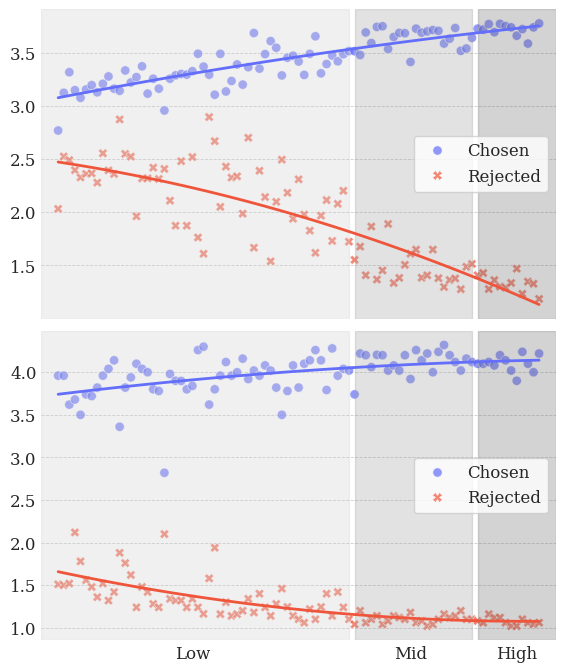

In [51]:
import seaborn as sns

# Set seaborn style
sns.set_style('whitegrid')
rcParams['font.family'] = 'DejaVu Serif'
rcParams['font.size'] = 12

# Define colors
y1_color = '#636EFA'
y2_color = '#EF553B'

back_color_1 = '#D0D0D0'  # Light Gray
back_color_2 = '#A0A0A0'  # Medium Gray
back_color_3 = '#707070'  # Dark Gray

title_font_size = 16
font_size = 12

# Prepare data for the first subplot
average_chosen_scores_1 = merged_1['average_chosen_scores']
average_rejected_scores_1 = merged_1['average_rejected_scores']
resource_1 = merged_1['resource_level']

x1 = np.array(range(len(average_chosen_scores_1)))

# Create DataFrame for the first subplot
df1_long = pd.DataFrame({
    'x': np.concatenate([x1, x1]),
    'score': np.concatenate([average_chosen_scores_1, average_rejected_scores_1]),
    'type': ['Chosen']*len(x1) + ['Rejected']*len(x1),
    'resource_level': list(resource_1) + list(resource_1)
})

# Prepare data for the second subplot
average_chosen_scores_2 = merged_2['average_chosen_scores']
average_rejected_scores_2 = merged_2['average_rejected_scores']
resource_2 = merged_2['resource_level']

x2 = np.array(range(len(average_chosen_scores_2)))

# Create DataFrame for the second subplot
df2_long = pd.DataFrame({
    'x': np.concatenate([x2, x2]),
    'score': np.concatenate([average_chosen_scores_2, average_rejected_scores_2]),
    'type': ['Chosen']*len(x2) + ['Rejected']*len(x2),
    'resource_level': list(resource_2) + list(resource_2)
})

# Prepare data for the third subplot
average_chosen_scores_3 = merged_3['average_chosen_scores']
average_rejected_scores_3 = merged_3['average_rejected_scores']
resource_3 = merged_3['resource_level']

x3 = np.array(range(len(average_chosen_scores_3)))

# Create DataFrame for the third subplot
df3_long = pd.DataFrame({
    'x': np.concatenate([x3, x3]),
    'score': np.concatenate([average_chosen_scores_3, average_rejected_scores_3]),
    'type': ['Chosen']*len(x3) + ['Rejected']*len(x3),
    'resource_level': list(resource_3) + list(resource_3)
})

# Function to fit a curve (polynomial fit)
def fit_func(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the first dataset
popt1_1, _ = curve_fit(fit_func, x1, average_chosen_scores_1)
popt2_1, _ = curve_fit(fit_func, x1, average_rejected_scores_1)

# Fit the second dataset
popt1_2, _ = curve_fit(fit_func, x2, average_chosen_scores_2)
popt2_2, _ = curve_fit(fit_func, x2, average_rejected_scores_2)

# Fit the third dataset
popt1_3, _ = curve_fit(fit_func, x3, average_chosen_scores_3)
popt2_3, _ = curve_fit(fit_func, x3, average_rejected_scores_3)

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
plt.tight_layout()
plt.subplots_adjust(hspace=0.04)

# First subplot
palette = {'Chosen': y1_color, 'Rejected': y2_color}

sns.scatterplot(
    data=df1_long,
    x='x',
    y='score',
    hue='type',
    style='type',
    palette=palette,
    s=45,
    alpha=0.7,
    ax=axs[0],
    legend=True
)

# Plot the fitted curves
x_fit = np.linspace(min(x1), max(x1), 100)
y_fit_chosen = fit_func(x_fit, *popt1_1)
y_fit_rejected = fit_func(x_fit, *popt2_1)

axs[0].plot(x_fit, y_fit_chosen, color=y1_color, linestyle='-', linewidth=2)
axs[0].plot(x_fit, y_fit_rejected, color=y2_color, linestyle='-', linewidth=2)

axs[0].set_xlim([-3, len(x1) + 2])

# Shade background regions
unique_resources = np.array(['low', 'medium', 'high'])
colors = [back_color_1, back_color_2, back_color_3]
midpoints = []

buffer = 3
for i, res in enumerate(unique_resources):
    indices = np.where(resource_1 == res)[0]
    if len(indices) == 0:
        continue
    if i == 0:
        start_idx = indices[0] - buffer
        end_idx = indices[-1]
    elif i == len(unique_resources) - 1:
        start_idx = indices[0]
        end_idx = indices[-1] + buffer
    else:
        start_idx = indices[0]
        end_idx = indices[-1]
    axs[0].axvspan(start_idx, end_idx, color=colors[i], alpha=0.3)
    midpoint = (start_idx + end_idx) // 2
    midpoints.append(midpoint)

axs[0].tick_params(axis='x', which='both', length=0)
axs[0].tick_params(axis='y', which='both', length=0)
axs[0].set_xticks(midpoints)
axs[0].set_xticklabels(['', '', ''])

for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].grid(True, which='both', axis='y', linestyle='--', linewidth=0.6)
axs[0].grid(False, axis='x')  # Turn off x-axis gridlines
axs[0].set_title('', fontsize=18)

axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].legend().set_title('')
axs[0].set_xticklabels(['Low', 'Mid', 'High'])

# axs[0].set_yticks([1, 2, 3, 4])


sns.move_legend(axs[0], 'center right')

# Second subplot
sns.scatterplot(
    data=df2_long,
    x='x',
    y='score',
    hue='type',
    style='type',
    palette=palette,
    s=45,
    alpha=0.7,
    ax=axs[1],
    legend=True
)

# Plot the fitted curves
x_fit = np.linspace(min(x2), max(x2), 100)
y_fit_chosen = fit_func(x_fit, *popt1_2)
y_fit_rejected = fit_func(x_fit, *popt2_2)

axs[1].plot(x_fit, y_fit_chosen, color=y1_color, linestyle='-', linewidth=2)
axs[1].plot(x_fit, y_fit_rejected, color=y2_color, linestyle='-', linewidth=2)

axs[1].set_xlim([-3, len(x2) + 2])

# Shade background regions
midpoints = []
for i, res in enumerate(unique_resources):
    indices = np.where(resource_2 == res)[0]
    if len(indices) == 0:
        continue
    if i == 0:
        start_idx = indices[0] - buffer
        end_idx = indices[-1]
    elif i == len(unique_resources) - 1:
        start_idx = indices[0]
        end_idx = indices[-1] + buffer
    else:
        start_idx = indices[0]
        end_idx = indices[-1]
    axs[1].axvspan(start_idx, end_idx, color=colors[i], alpha=0.3)
    midpoint = (start_idx + end_idx) // 2
    midpoints.append(midpoint)

axs[1].tick_params(axis='x', which='both', length=0)
axs[1].tick_params(axis='y', which='both', length=0)
axs[1].set_xticks(midpoints)
axs[1].set_xticklabels(['', '', ''])

for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].grid(True, which='both', axis='y', linestyle='--', linewidth=0.6)
axs[1].grid(False, axis='x')  # Turn off x-axis gridlines
axs[1].set_title('', fontsize=18)

axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].legend().set_title('')
axs[1].set_xticklabels(['Low', 'Mid', 'High'])

# axs[1].set_yticks([1, 2, 3, 4])

sns.move_legend(axs[1], 'center right')

# Third subplot
sns.scatterplot(
    data=df3_long,
    x='x',
    y='score',
    hue='type',
    style='type',
    palette=palette,
    s=45,
    alpha=0.7,
    ax=axs[2],
    legend=True
)

# Plot the fitted curves
x_fit = np.linspace(min(x3), max(x3), 100)
y_fit_chosen = fit_func(x_fit, *popt1_3)
y_fit_rejected = fit_func(x_fit, *popt2_3)

axs[2].plot(x_fit, y_fit_chosen, color=y1_color, linestyle='-', linewidth=2)
axs[2].plot(x_fit, y_fit_rejected, color=y2_color, linestyle='-', linewidth=2)

axs[2].set_xlim([-3, len(x3) + 2])

# Shade background regions
midpoints = []
for i, res in enumerate(unique_resources):
    indices = np.where(resource_3 == res)[0]
    if len(indices) == 0:
        continue
    if i == 0:
        start_idx = indices[0] - buffer
        end_idx = indices[-1]
    elif i == len(unique_resources) - 1:
        start_idx = indices[0]
        end_idx = indices[-1] + buffer
    else:
        start_idx = indices[0]
        end_idx = indices[-1]
    axs[2].axvspan(start_idx, end_idx, color=colors[i], alpha=0.3)
    midpoint = (start_idx + end_idx) // 2
    midpoints.append(midpoint)

axs[2].tick_params(axis='x', which='both', length=0)
axs[2].tick_params(axis='y', which='both', length=0)
axs[2].set_xticks(midpoints)
axs[2].set_xticklabels(['Low', 'Mid', 'High'])

for spine in axs[2].spines.values():
    spine.set_visible(False)
axs[2].grid(True, which='both', axis='y', linestyle='--', linewidth=0.6)
axs[2].grid(False, axis='x')  # Turn off x-axis gridlines
axs[2].set_title('', fontsize=18)

axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[2].legend().set_title('')

sns.move_legend(axs[2], 'center right')

plt.savefig('figure1_2_nocaps.pdf')
plt.show()

In [7]:
import matplotlib
import matplotlib.font_manager
matplotlib.font_manager.get_font_names()

['msbm10',
 'Sawasdee',
 'Liberation Mono',
 'Nimbus Sans',
 'Loma',
 'Bitstream Vera Sans Mono',
 'Padauk',
 'Laksaman',
 'D050000L',
 'FreeSans',
 'Sarai',
 'Purisa',
 'URW Gothic',
 'Pothana2000',
 'Lohit Assamese',
 'KacstPen',
 'STIXSizeFourSym',
 'KacstNaskh',
 'Lohit Malayalam',
 'Ubuntu Condensed',
 'Liberation Sans Narrow',
 'Dyuthi',
 'wasy10',
 'cmb10',
 'Lohit Kannada',
 'Bitstream Vera Sans',
 'KacstFarsi',
 'Meera',
 'Lohit Bengali',
 'Karumbi',
 'STIXSizeOneSym',
 'Norasi',
 'Rasa',
 'Suruma',
 'Samanata',
 'Rekha',
 'Rachana',
 'STIXSizeTwoSym',
 'KacstArt',
 'Phetsarath OT',
 'Garuda',
 'Jamrul',
 'Gubbi',
 'Vemana2000',
 'Bitstream Vera Serif',
 'DejaVu Sans',
 'Chandas',
 'Kalapi',
 'KacstOne',
 'Samyak Devanagari',
 'Ubuntu Mono',
 'Lohit Tamil',
 'Umpush',
 'Tlwg Mono',
 'KacstDecorative',
 'KacstDigital',
 'Saab',
 'Gargi',
 'DejaVu Sans Mono',
 'KacstLetter',
 'URW Bookman',
 'Ani',
 'Noto Serif CJK JP',
 'DejaVu Sans Display',
 'Lohit Tamil Classical',
 'cmsy10'

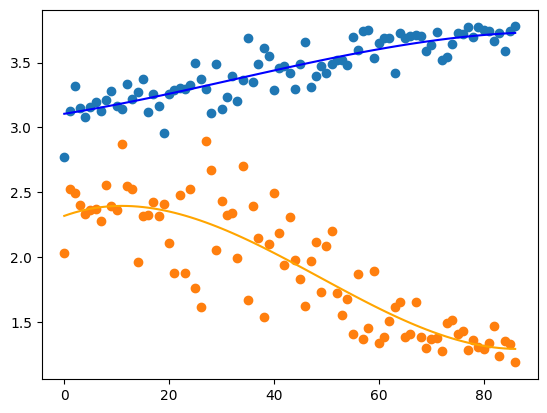

In [21]:
average_chosen_scores = merged_1['average_chosen_scores']
average_rejected_scores = merged_1['average_rejected_scores']

x = range(len(average_chosen_scores))

plt.scatter(x, average_chosen_scores, label='Chosen')
plt.scatter(x, average_rejected_scores, label='Rejected')

coeffs = np.polyfit(x, average_chosen_scores, 3)
regression_line_chosen = np.polyval(coeffs, x)

coeffs = np.polyfit(x, average_rejected_scores, 3)
regression_line_rejected = np.polyval(coeffs, x)

plt.plot(x, regression_line_chosen, label='Chosen Regression Line', color='blue')
plt.plot(x, regression_line_rejected, label='Rejected Regression Line', color='orange')

plt.savefig('figures/tmp.pdf')
plt.show()

<Figure size 640x480 with 0 Axes>

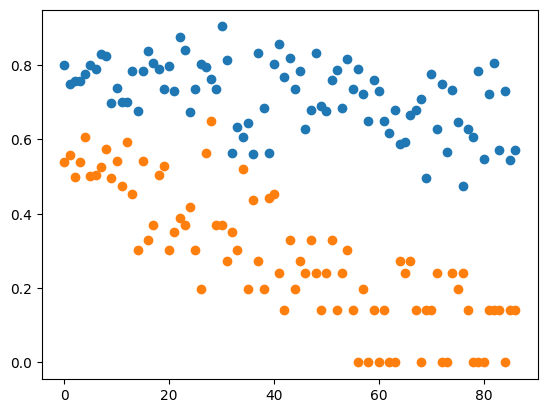

In [12]:
std_chosen_cscores = merged['std_chosen_scores']
std_rejected_cscores = merged['std_rejected_scores']

plt.scatter(range(len(std_chosen_cscores)), std_chosen_cscores, label='Chosen')
plt.scatter(range(len(std_rejected_cscores)), std_rejected_cscores, label='Rejected')

plt.show()

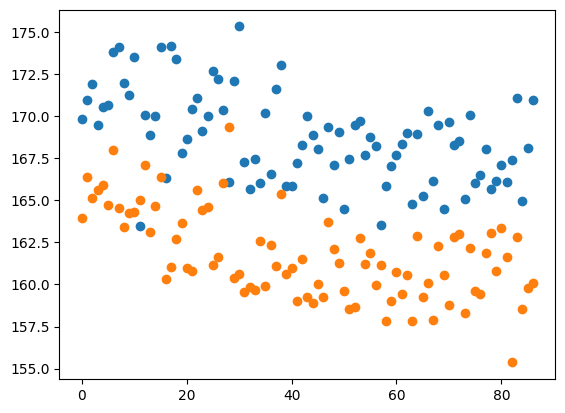

In [25]:
# do for token counts
average_chosen_ctokens = merged['average_chosen_token_counts']
average_rejected_ctokens = merged['average_rejected_token_counts']

plt.scatter(range(len(average_chosen_ctokens)), average_chosen_ctokens, label='Chosen')
plt.scatter(range(len(average_rejected_ctokens)), average_rejected_ctokens, label='Rejected')

plt.show()

In [27]:
all_scores, all_feedbacks = [], []
for file in onlyfiles:
    scores, feedbacks = read(join(rejected_path, file))
    all_scores.append(scores)
    all_feedbacks.append(feedbacks)

In [28]:
average_scores, std_scores = [], []
for scores in all_scores:
    mean, std = get_mean_std(scores)
    average_scores.append(mean)
    std_scores.append(std)

In [29]:
tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M")

average_token_counts, std_token_counts = [], []
for feedbacks in all_feedbacks:
    mean, std = get_avg_token_count(feedbacks.to_list(), tokenizer)
    average_token_counts.append(mean)
    std_token_counts.append(std)

/home/dongkeun/miniconda3/envs/reward/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [30]:
lang_code = [f.split('.')[0] for f in onlyfiles]

analysis_df = pd.DataFrame({
    'flores_codes': lang_code,
    'avg_scores': average_scores,
    'sd_scores': std_scores,
    'avg_length': average_token_counts,
})

analysis_df.head(3)

,flores_codes,avg_scores,sd_scores,avg_length
0,acm_Arab,1.401656,0.611234,204.106776
1,afr_Latn,1.539095,0.643376,214.248460
2,als_Latn,1.832645,0.813250,214.513347


In [31]:
merged = pd.merge(lang_orders, analysis_df, on='flores_codes', how='inner')
merged.head(3)

,primary_language,crawl,pages,urls,%pages/crawl,proportion,flores_codes,avg_scores,sd_scores,avg_length
0,ssw,CC-MAIN-2018-34CC-MAIN-2018-39CC-MAIN-2018-43C...,61825,60222,0.0010,4.043270e-07,ssw_Latn,2.032854,0.782360,214.973306
1,tso,CC-MAIN-2018-34CC-MAIN-2018-39CC-MAIN-2018-43C...,96870,96234,0.0031,6.335165e-07,tso_Latn,2.525667,0.835712,213.963039
2,nso,CC-MAIN-2018-34CC-MAIN-2018-39CC-MAIN-2018-43C...,165262,164947,0.0063,1.080791e-06,nso_Latn,2.491770,0.841534,226.572895


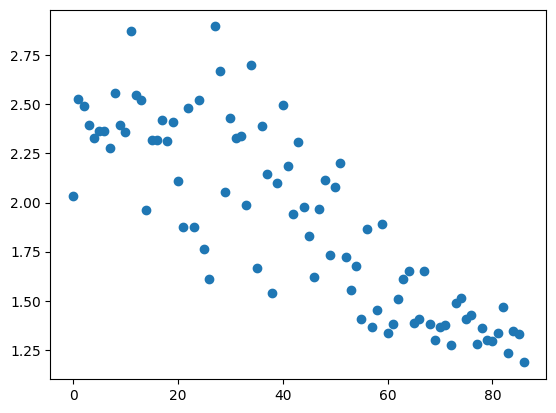

In [32]:
average_scores = merged['avg_scores']

plt.scatter(range(len(average_scores)), average_scores)

In [21]:
from copydf import copyDF

analysis_df.index = average_scores
analysis_df.index.name = 'average_scores'
copyDF(analysis_df)

<IPython.core.display.Javascript object>

In [15]:
lang_class = pd.read_json('analysis_data/language_classifications.json').transpose()
langs = [file.split('.json')[0] for file in onlyfiles]
# only select rows that are in the list of languages
lang_class = lang_class[lang_class.index.isin(langs)]
# sort lang_class by langs
lang_class = lang_class.reindex(langs)
lang_class.index = langs
lang_class = lang_class[['Language', 'Family', 'Res']]
lang_class.head(3)

,Language,Family,Res
en,NaN,NaN,NaN
ar,NaN,NaN,NaN
es,NaN,NaN,NaN


In [38]:
copyDF(lang_class)

<IPython.core.display.Javascript object>

In [19]:
performance = pd.read_json('analysis_data/belebele_performance.json')
performance.index = performance['GPT-3.5 Turbo']
performance = performance.drop(columns=['GPT-3.5 Turbo'])
performance.head(3)

,Llama 2 Instruct
GPT-3.5 Turbo,
87.7,78.8
51.6,35.9
78.3,57.9


In [20]:
copyDF(performance)

<IPython.core.display.Javascript object>